## Assignment 3 mini project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
data = datasets.load_diabetes()

In [3]:
df = pd.DataFrame(data = data.data, columns = data['feature_names'])
df['target'] = data['target']
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff861625e90>,
      dtype=object)

In [6]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size = 0.2, random_state = 0)
train_target = data_train['target']
feature_set = data_train.drop(columns='target', inplace=True)
#decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_fit = dt.fit(data_train,train_target)

/Users/zhangliwei/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(dt_fit,data_train,train_target,scoring = 'neg_mean_squared_error')
root_mean_dt_scores =  np.sqrt(np.mean(dt_scores**2))
root_mean_dt_scores

6459.934486176918

In [8]:
standard_deviation = np.std(dt_scores)  
standard_deviation

1081.6839696814418

In [9]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_fit = rf.fit(data_train,train_target)
rf_scores = cross_val_score(rf_fit,data_train,train_target,scoring = 'neg_mean_squared_error')
root_mean_rf_scores =  np.sqrt(np.mean(rf_scores**2))
root_mean_rf_scores

3318.9132395764054

In [10]:
standard_deviation = np.std(rf_scores)  
standard_deviation

300.0504194124446

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},

{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
rf1 = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(rf1, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(data_train,train_target)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [13]:
#Best performing model
print(grid_search.best_params_)

{'max_features': 4, 'n_estimators': 30}


In [14]:
for i in range(len(grid_search.cv_results_['params'])):
    print('params:', grid_search.cv_results_['params'][i], 'rmse:', grid_search.cv_results_['mean_test_score'][i])

params: {'max_features': 2, 'n_estimators': 3} rmse: -4698.03780460541
params: {'max_features': 2, 'n_estimators': 10} rmse: -3569.2817786720325
params: {'max_features': 2, 'n_estimators': 30} rmse: -3300.7808066174825
params: {'max_features': 4, 'n_estimators': 3} rmse: -4388.575676279901
params: {'max_features': 4, 'n_estimators': 10} rmse: -3388.9154144869217
params: {'max_features': 4, 'n_estimators': 30} rmse: -3166.09569827856
params: {'max_features': 6, 'n_estimators': 3} rmse: -3929.1689559579704
params: {'max_features': 6, 'n_estimators': 10} rmse: -3290.1800164989936
params: {'max_features': 6, 'n_estimators': 30} rmse: -3234.74623089649
params: {'max_features': 8, 'n_estimators': 3} rmse: -3856.8881198300924
params: {'max_features': 8, 'n_estimators': 10} rmse: -3388.2259275653923
params: {'max_features': 8, 'n_estimators': 30} rmse: -3254.907983769283
params: {'bootstrap': False, 'max_features': 2, 'n_estimators': 3} rmse: -4300.698417169684
params: {'bootstrap': False, 'ma

In [15]:
target_test = data_test['target']
data_test.drop(columns='target', inplace=True)

/Users/zhangliwei/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
#decision tree
from sklearn.metrics import mean_squared_error
import math
y_pred = dt.predict(data_test)
target_test3 = np.asarray(target_test)

mse = mean_squared_error(target_test3,y_pred)
root_mean_squared_error = math.sqrt(mse)
print('Root mean squared error of decision tree is',
      root_mean_squared_error)

Root mean squared error of decision tree is 83.80320714680249


In [17]:
#random forest
from sklearn.metrics import mean_squared_error
y_pred = rf.predict(data_test)
target_test4 = np.asarray(target_test)

mse = mean_squared_error(target_test4,y_pred)
root_mean_squared_error = math.sqrt(mse)
print('Root mean squared error of random forest is',
      root_mean_squared_error)

Root mean squared error of random forest is 61.3960170541409


## Assignment 4 mini project

In [18]:
from sklearn import datasets
data = datasets.load_diabetes()

In [19]:
df = pd.DataFrame(data = data.data, columns = data['feature_names'])
df['target'] = data['target']
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [20]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size = 0.2, random_state = 0)
train_target = data_train['target']
feature_set = data_train.drop(columns='target', inplace=True)
X_train = data_train[["age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"]]
y_train = train_target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tran = scaler.fit_transform(X_train)
from sklearn.neighbors import KNeighborsClassifier
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))

/Users/zhangliwei/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Assignment 5 mini project

In [21]:
data = pd.read_csv('amazon.csv')
data = data.loc[0:210]
data["product_dis"] = data["product_information"] + " " + data["product_description"]
data = data.drop(columns=['product_information', 'product_description'])
data.head(5)

uniq_id  \
0  eac7efa5dbd3d667f26eb3d3ab504464   
1  b17540ef7e86e461d37f3ae58b7b72ac   
2  348f344247b0c1a935b1223072ef9d8a   
3  e12b92dbb8eaee78b22965d2a9bbbd9f   
4  e33a9adeed5f36840ccc227db4682a36   

                                        product_name manufacturer   price  \
0                              Hornby 2014 Catalogue       Hornby   £3.42   
1  FunkyBuys® Large Christmas Holiday Express Fes...    FunkyBuys  £16.99   
2  CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...          ccf   £9.99   
3     HORNBY Coach R4410A BR Hawksworth Corridor 3rd       Hornby  £39.99   
4  Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...       Hornby  £32.19   

  number_available_in_stock number_of_reviews  number_of_answered_questions  \
0                     5 new                15                           1.0   
1                       NaN                 2                           1.0   
2                     2 new                17                           2.0   
3                       NaN                 1                           2.0   
4                       NaN                 3                           2.0   

  average_review_rating                   amazon_category_and_sub_category  \
0    4.9 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   
1    4.5 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   
2    3.9 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   
3    5.0 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   
4    4.7 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   

          customers_who_bought_this_item_also_bought  \
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
1  http://www.amazon.co.uk/Christmas-Holiday-Expr...   
2  http://www.amazon.co.uk/Classic-Train-Lights-B...   
3                                                NaN   
4  http://www.amazon.co.uk/Hornby-R6367-RailRoad-...   

                                         description  \
0  Product Description Hornby 2014 Catalogue Box ...   
1  Size Name:Large FunkyBuys® Large Christmas Hol...   
2  BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...   
3  Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...   
4  Product Description Hornby RailRoad 0-4-0 Gild...   

         items_customers_buy_after_viewing_this_item  \
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
1  http://www.amazon.co.uk/Christmas-Holiday-Expr...   
2  http://www.amazon.co.uk/Train-With-Tracks-Batt...   
3                                                NaN   
4  http://www.amazon.co.uk/Hornby-R2672-RailRoad-...   

                      customer_questions_and_answers  \
0  Does this catalogue detail all the previous Ho...   
1  can you turn off sounds // hi no you cant turn...   
2  What is the gauge of the track // Hi Paul.Trut...   
3                                                NaN   
4                                                NaN   

                                    customer_reviews  \
0  Worth Buying For The Pictures Alone (As Ever) ...   
1  Four Stars // 4.0 // 18 Dec. 2015 // By\n    \...   
2  **Highly Recommended!** // 5.0 // 26 May 2015 ...   
3  I love it // 5.0 // 22 July 2013 // By\n    \n...   
4  Birthday present // 5.0 // 14 April 2014 // By...   

                                             sellers  \
0  {"seller"=>[{"Seller_name_1"=>"Amazon.co.uk", ...   
1  {"seller"=>{"Seller_name_1"=>"UHD WHOLESALE", ...   
2  {"seller"=>[{"Seller_name_1"=>"DEAL-BOX", "Sel...   
3                                                NaN   
4                                                NaN   

                                         product_dis  
0  Technical Details Item Weight640 g Product Dim...  
1  Technical Details Manufacturer recommended age...  
2  Technical Details Manufacturer recommended age...  
3  Technical Details Item Weight259 g Product Dim...  
4  Technical Details Item Weight159 g Product Dim...

In [22]:
data = data.dropna()
input_var = data[data.columns[3:6]]
output_var = data[data.columns[7]]
X_train, X_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = "english", ngram_range = (1,2))
train_tfidf = tfidf.fit_transform(X_train)
test_tfidf = tfidf.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_tfidf, y_train)
train_predict = model.predict(train_tfidf)
train_score = model.score(train_tfidf, y_train)

test_predict = model.predict(test_tfidf)
test_score = model.score(test_tfidf, y_test)

print(train_score, test_score)

ValueError: Found input variables with inconsistent numbers of samples: [3, 7]

## Assignment 7 mini project

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [24]:
ds = datasets.load_wine()
df = pd.DataFrame(ds.data)
df.columns = ['alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids',
              'nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']
df.head()

alcohol  malicAcid   ash  ashalcalinity  magnesium  totalPhenols  \
0    14.23       1.71  2.43           15.6      127.0          2.80   
1    13.20       1.78  2.14           11.2      100.0          2.65   
2    13.16       2.36  2.67           18.6      101.0          2.80   
3    14.37       1.95  2.50           16.8      113.0          3.85   
4    13.24       2.59  2.87           21.0      118.0          2.80   

   flavanoids  nonFlavanoidPhenols  proanthocyanins  colorIntensity   hue  \
0        3.06                 0.28             2.29            5.64  1.04   
1        2.76                 0.26             1.28            4.38  1.05   
2        3.24                 0.30             2.81            5.68  1.03   
3        3.49                 0.24             2.18            7.80  0.86   
4        2.69                 0.39             1.82            4.32  1.04   

   od280_od315  proline  
0         3.92   1065.0  
1         3.40   1050.0  
2         3.17   1185.0  
3         3.45   1480.0  
4         2.93    735.0

In [25]:
df.isnull().sum()

alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
fit_tran = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(data = fit_tran, columns = ['component 1', 'component 2'])
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(15, 8)) 
plt.title('agglomerative clustering') 
dendrogram = shc.dendrogram((shc.linkage(df_pca, method ='ward')))
plt.show()

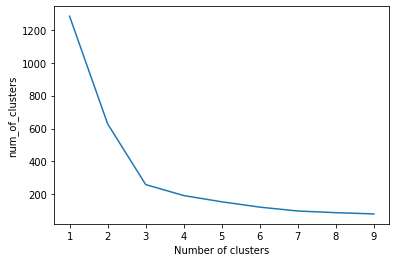

In [27]:
from sklearn.cluster import KMeans
num_of_clusters = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(df_pca)
    num_of_clusters.append(kmeans.inertia_)

plt.plot(range(1, 10), num_of_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('num_of_clusters')
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
pre_cluster = kmeans.fit_predict(df_pca)
df_pca['predict'] = pd.DataFrame(pre_cluster)
groups = df_pca.groupby("predict")
for name, group in groups:
    plt.plot(group["component 1"], group["component 2"], marker="o", linestyle="", label=name)
plt.legend()

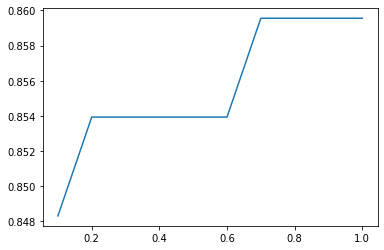

In [29]:
df['label'] = pd.DataFrame(pre_cluster)
#logistic regression
logreg = LogisticRegression(random_state = 0)

X_train = df_pca.iloc[:,0:1]
y_train = df_pca['predict']
logreg.fit(X_train, y_train)
logreg.predict(X_train)
#cutoff value c
value = np.arange(0.1,1.1,0.1)
acc = []
for i in value:
    logreg = LogisticRegression(C=i, random_state = 0)
    logreg.fit(X_train, y_train)
    acc.append(logreg.score(X_train, y_train))

plt.plot(value,acc)
plt.show()

In [30]:
#Optimal cut off
logreg = LogisticRegression(C=0.1, random_state = 0)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.848314606741573

In [31]:
#Part 2

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
df = pd.read_csv('Social_Network_Ads.csv')
df['gender'] = pd.get_dummies(df['Gender'])['Female']
df = df.drop(columns=['Gender'])
X = df[['gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']
res = sm.Logit(y, X).fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.677546
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                -0.03923
Time:                        20:40:31   Log-Likelihood:                -271.02
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gender             -0.5371      0.201     -2.666      0.008      -0.932      -0.142
Age           

In [33]:
y_pred = res.predict(X)
y_pred = list(map(round, y_pred)) 

In [34]:
accuracy_score(y,y_pred)

0.4825